In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
from prophet import Prophet 
from prophet.plot import plot_cross_validation_metric
from prophet.diagnostics import performance_metrics, cross_validation

In [47]:


df = pd.read_csv('../clean_data/ex_factory_vols.csv')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    51 non-null     object 
 1   Data type  51 non-null     object 
 2   Measure    51 non-null     object 
 3   Product    51 non-null     object 
 4   Date       51 non-null     object 
 5   Value      51 non-null     float64
dtypes: float64(1), object(5)
memory usage: 2.5+ KB


In [48]:
df.index.min(), df.index.max()


(0, 50)

In [49]:
# Preparing the data
uni_data = df.reset_index()[['Date', 'Value']]
uni_data = uni_data.rename(columns={'Date': 'ds', 'Value': 'y'})

uni_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      51 non-null     object 
 1   y       51 non-null     float64
dtypes: float64(1), object(1)
memory usage: 948.0+ bytes


In [50]:
## preprocess data





In [51]:
# Splitting the data into training and validation sets
split_date = '2023-11-01' 
train = uni_data[uni_data['ds'] < split_date]
test = uni_data[uni_data['ds'] >= split_date]

print(f"train shape : {train.shape} and test shape : {test.shape}")

train shape : (39, 2) and test shape : (12, 2)


In [52]:

# Training the model
uni_model = Prophet()
uni_model.fit(train)

01:32:20 - cmdstanpy - INFO - Chain [1] start processing
01:32:20 - cmdstanpy - INFO - Chain [1] done processing


In [53]:
# Making predictions on the validation set
future_uni = uni_model.make_future_dataframe(periods=20, freq='MS')
forecast_uni = uni_model.predict(future_uni)

In [54]:
forecast_uni.tail(10)


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
49,2024-09-01,110849.015458,103070.936679,119643.447841,110843.552022,110854.390469,452.226341,452.226341,452.226341,452.226341,452.226341,452.226341,0.0,0.0,0.0,111301.241800
50,2024-10-01,112952.276637,101303.052579,117479.714180,112946.038814,112958.322368,-3778.267853,-3778.267853,-3778.267853,-3778.267853,-3778.267853,-3778.267853,0.0,0.0,0.0,109174.008784
51,2024-11-01,115125.646522,113036.401079,129929.388083,115118.520027,115132.431174,6634.652949,6634.652949,6634.652949,6634.652949,6634.652949,6634.652949,0.0,0.0,0.0,121760.299471
52,2024-12-01,117228.907700,107845.667404,123806.508617,117220.759057,117236.366532,-1382.749848,-1382.749848,-1382.749848,-1382.749848,-1382.749848,-1382.749848,0.0,0.0,0.0,115846.157852
53,2025-01-01,119402.277585,109325.603885,124665.696151,119392.985703,119410.615201,-2166.408645,-2166.408645,-2166.408645,-2166.408645,-2166.408645,-2166.408645,0.0,0.0,0.0,117235.868940
54,2025-02-01,121575.647469,111146.629816,126095.275635,121565.427088,121584.720840,-2849.600609,-2849.600609,-2849.600609,-2849.600609,-2849.600609,-2849.600609,0.0,0.0,0.0,118726.046861
55,2025-03-01,123538.691236,115840.007478,131987.306011,123527.497195,123548.691760,73.441063,73.441063,73.441063,73.441063,73.441063,73.441063,0.0,0.0,0.0,123612.132300
56,2025-04-01,125712.061121,112985.598488,129094.737048,125699.552355,125722.793205,-4657.583823,-4657.583823,-4657.583823,-4657.583823,-4657.583823,-4657.583823,0.0,0.0,0.0,121054.477298
57,2025-05-01,127815.322299,120732.331372,136944.733347,127801.951510,127827.170973,1288.332375,1288.332375,1288.332375,1288.332375,1288.332375,1288.332375,0.0,0.0,0.0,129103.654675
58,2025-06-01,129988.692184,115874.575382,131855.814786,129974.385135,130001.617852,-6112.986476,-6112.986476,-6112.986476,-6112.986476,-6112.986476,-6112.986476,0.0,0.0,0.0,123875.705708


In [34]:
test.columns


Index(['ds', 'y'], dtype='object')

In [35]:
y_pred_df_uni = forecast_uni[forecast_uni['ds'] >= split_date][['ds', 'yhat']]
print(y_pred_df_uni.head())

           ds          yhat
39 2023-11-01  89963.391689
40 2023-12-01  83173.355417
41 2024-01-01  95915.373685
42 2024-02-01  94285.468131
43 2024-03-01  94563.086700


In [60]:

print(y_pred_df_uni.info())



<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 39 to 58
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      20 non-null     datetime64[ns]
 1   yhat    20 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 480.0 bytes
None


In [62]:
y = test['y'].values
yhat = y_pred_df_uni['yhat'].values

sumerror= 0
for i in range(len(y)):
    sumerror += (y[i] - yhat[i])**2

rmse = np.sqrt(sumerror/len(y))
    
print(rmse)

11349.652426917306


In [79]:
# Making predictions on the validation set
future_uni = uni_model.make_future_dataframe(periods=50, freq='MS')
forecast_uni = uni_model.predict(future_uni)
forecast_uni.tail(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
79,2027-03-01,174718.046583,173722.972894,189490.534307,174676.314249,174761.763208,6729.544168,6729.544168,6729.544168,6729.544168,6729.544168,6729.544168,0.0,0.0,0.0,181447.590751
80,2027-04-01,176891.416467,156674.607624,172683.489695,176847.896750,176936.836048,-12157.587306,-12157.587306,-12157.587306,-12157.587306,-12157.587306,-12157.587306,0.0,0.0,0.0,164733.829161
81,2027-05-01,178994.677646,158921.650877,175022.090109,178949.241695,179041.325717,-11836.856498,-11836.856498,-11836.856498,-11836.856498,-11836.856498,-11836.856498,0.0,0.0,0.0,167157.821148
82,2027-06-01,181168.047530,189121.909228,205145.699088,181121.419526,181216.286550,15968.425457,15968.425457,15968.425457,15968.425457,15968.425457,15968.425457,0.0,0.0,0.0,197136.472987
83,2027-07-01,183271.308709,172413.151360,189272.416050,183223.106724,183321.565479,-2247.271575,-2247.271575,-2247.271575,-2247.271575,-2247.271575,-2247.271575,0.0,0.0,0.0,181024.037134
84,2027-08-01,185444.678594,169338.233797,184568.496924,185395.164649,185497.031759,-8435.624409,-8435.624409,-8435.624409,-8435.624409,-8435.624409,-8435.624409,0.0,0.0,0.0,177009.054185
85,2027-09-01,187618.048478,177787.011361,194113.709102,187566.885540,187672.186561,-1666.259621,-1666.259621,-1666.259621,-1666.259621,-1666.259621,-1666.259621,0.0,0.0,0.0,185951.788857
86,2027-10-01,189721.309657,191071.072664,207274.625021,189668.585012,189777.493338,9304.483536,9304.483536,9304.483536,9304.483536,9304.483536,9304.483536,0.0,0.0,0.0,199025.793193
87,2027-11-01,191894.679541,184305.479580,200383.411357,191840.608255,191952.893757,497.531546,497.531546,497.531546,497.531546,497.531546,497.531546,0.0,0.0,0.0,192392.211088
88,2027-12-01,193997.940720,177544.103886,193711.276727,193942.146053,194058.580602,-8395.765904,-8395.765904,-8395.765904,-8395.765904,-8395.765904,-8395.765904,0.0,0.0,0.0,185602.174817


In [80]:
# Display the last 10 predictions
print(forecast_uni[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10))

# If you want to filter and display only the new predicted dates (future periods):
predicted_future = forecast_uni[forecast_uni['ds'] > test['ds'].max()]
print(predicted_future[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])


           ds           yhat     yhat_lower     yhat_upper
79 2027-03-01  181447.590751  173722.972894  189490.534307
80 2027-04-01  164733.829161  156674.607624  172683.489695
81 2027-05-01  167157.821148  158921.650877  175022.090109
82 2027-06-01  197136.472987  189121.909228  205145.699088
83 2027-07-01  181024.037134  172413.151360  189272.416050
84 2027-08-01  177009.054185  169338.233797  184568.496924
85 2027-09-01  185951.788857  177787.011361  194113.709102
86 2027-10-01  199025.793193  191071.072664  207274.625021
87 2027-11-01  192392.211088  184305.479580  200383.411357
88 2027-12-01  185602.174817  177544.103886  193711.276727
           ds           yhat     yhat_lower     yhat_upper
51 2024-11-01  121760.299471  114009.040485  128975.029611
52 2024-12-01  115846.157852  108146.576886  123736.198731
53 2025-01-01  117235.868940  109259.401404  124890.926619
54 2025-02-01  118726.046861  110550.009593  126410.479766
55 2025-03-01  123612.132300  115734.458515  131332.4077

In [81]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 39 to 50
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      12 non-null     datetime64[ns]
 1   y       12 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 288.0 bytes


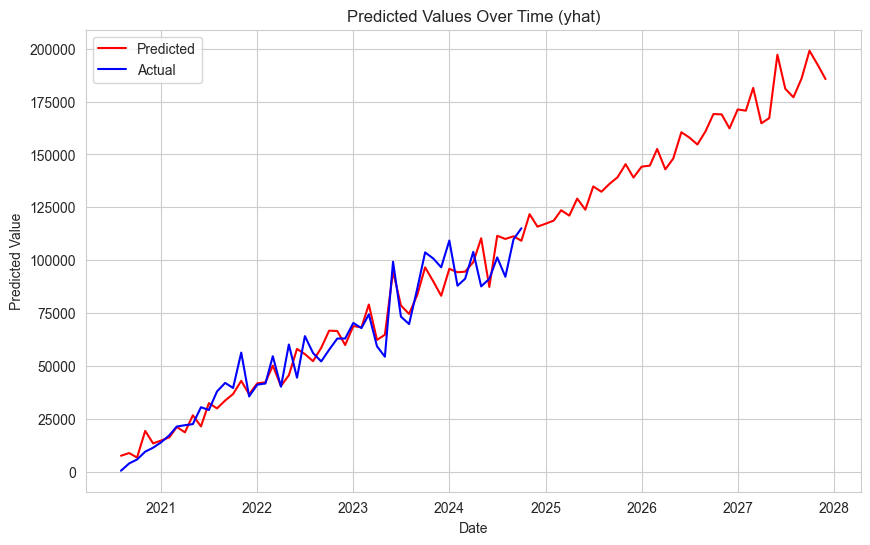

In [82]:
import matplotlib.pyplot as plt

df['Date'] = pd.to_datetime(df['Date'])
forecast_uni['ds'] = pd.to_datetime(forecast_uni['ds'])

# Plot ds vs yhat
plt.figure(figsize=(10, 6))
plt.plot(forecast_uni['ds'], forecast_uni['yhat'], label='Predicted', color='red')
# print test in red
plt.plot(df['Date'], df['Value'], label='Actual', color='blue')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Predicted Value')
plt.title('Predicted Values Over Time (yhat)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()